In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('GOOG.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3803,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3804,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3805,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3806,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
3807,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1162400


In [24]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()

In [25]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [26]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[7.42148227e-04, 2.98909923e-03, 6.47716504e-04, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 4.19769536e-03, 3.83867225e-03,
        2.22150736e-01],
       [4.91367646e-03, 4.01532941e-03, 1.92238659e-03, 1.98678849e-03,
        1.85522018e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.89936884e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20026849e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12100139e-01, 8.09012935e-01,
        1.79975186e-02]])

In [27]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [28]:
X_train.shape

(3556, 60, 5)

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [30]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [31]:
regressor.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [32]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
112/112 [==============================] - 20s 179ms/step - loss: 0.0138
Epoch 2/50
112/112 [==============================] - 13s 119ms/step - loss: 0.0022
Epoch 3/50
112/112 [==============================] - 14s 124ms/step - loss: 0.0022
Epoch 4/50
112/112 [==============================] - 13s 113ms/step - loss: 0.0017
Epoch 5/50
112/112 [==============================] - 13s 118ms/step - loss: 0.0015
Epoch 6/50
112/112 [==============================] - 22s 200ms/step - loss: 0.0015
Epoch 7/50
112/112 [==============================] - 19s 165ms/step - loss: 0.0014
Epoch 8/50
112/112 [==============================] - 15s 133ms/step - loss: 0.0014
Epoch 9/50
112/112 [==============================] - 15s 133ms/step - loss: 0.0013
Epoch 10/50
112/112 [==============================] - 14s 123ms/step - loss: 0.0012
Epoch 11/50
112/112 [==============================] - 16s 142ms/step - loss: 0.0012
Epoch 12/50
112/112 [==============================] - 14s 121ms/step - lo

In [33]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3616,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3617,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3618,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3619,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3620,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [34]:
past_60_days = data_test.tail(60)

In [35]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1143.989990,1147.339966,1138.780029,1144.900024,864000
1,1146.859985,1150.819946,1139.400024,1150.339966,903800
2,1146.000000,1158.579956,1145.000000,1153.579956,1238800
3,1150.969971,1158.359985,1145.770020,1146.349976,1170000
4,1141.739990,1147.604980,1132.729980,1146.329956,1291300


In [36]:
inputs = scaler.transform(df)
inputs

array([[0.89602895, 0.89654266, 0.90811303, 0.89870435, 0.01037275],
       [0.89837835, 0.89938762, 0.90862981, 0.90316877, 0.01085497],
       [0.89767436, 0.90573159, 0.91329749, 0.90582774, 0.01491393],
       ...,
       [0.93940683, 0.93712442, 0.93521069, 0.9247443 , 0.01947328],
       [0.92550693, 0.93064972, 0.92782574, 0.9339358 , 0.01954719],
       [0.93524016, 0.94894575, 0.95011399, 0.95130949, 0.01398824]])

In [37]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((192, 60, 5), (192,))

In [38]:
y_pred = regressor.predict(X_test)

In [39]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.33517573e-04, 8.20673293e-04,
       1.21162775e-08])

In [40]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [41]:
y_pred = y_pred*scale
y_test = y_test*scale

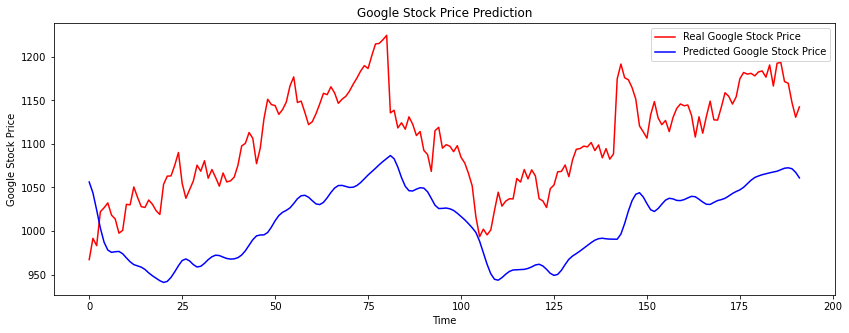

In [42]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()